In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 
import signals_systems as sys

In [2]:
f_sample = 44100 # sampling frequency (Hz)
f_c = 50 # cutoff frequency (Hz)
order = 2 # order of filter
w_c = f_c/(0.5*f_sample) # frequency normalized from 0 to 1

# LPF Butter with b, a coefficients

In [3]:
# generates the coefficients b,a that corresponds to the equation of h(jw) = b(jw)/a(jw)
b, a = signal.butter(N=order, Wn=w_c, btype='low', output='ba') # digital butterworth
# obtain the phase w and the magnitude h
wn, h = signal.freqz(b, a)
f = wn*f_sample/(2*np.pi) # return the angular frequency, from 0 to pi, to frequency in hertz
mag_db = 20*np.log10(abs(h)) # transform the magnitude to decibels
phase = np.angle(h)*(180/np.pi)

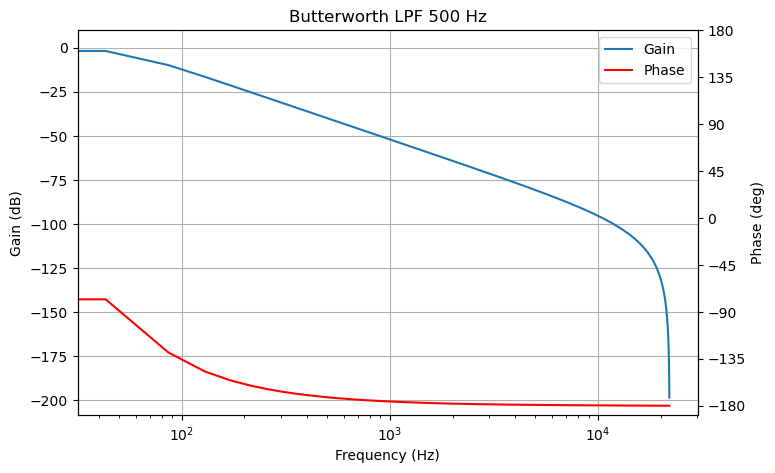

In [4]:
fig, axs = plt.subplots(1,1, figsize=(8,5))

magnitude_plot = axs.semilogx(f, mag_db, label='Gain')
axs.set_xlabel('Frequency (Hz)')
axs.set_ylabel('Gain (dB)')
axs.set_title('Butterworth LPF 500 Hz')

ax2 = axs.twinx()
phase_plot = ax2.plot(f, phase, 'r', label='Phase')
ax2.set_ylabel('Phase (deg)')
ax2.set_yticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])


plots = magnitude_plot + phase_plot
labels = [l.get_label() for l in plots]
axs.legend(plots, labels)
axs.grid()
plt.show()

# Filter signal with b, a coeficients

In [5]:
t = np.linspace(0, 5, 44100*5)
sg = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*10*t)
sg_filter = signal.lfilter(b, a, sg)

(0.0, 0.2)

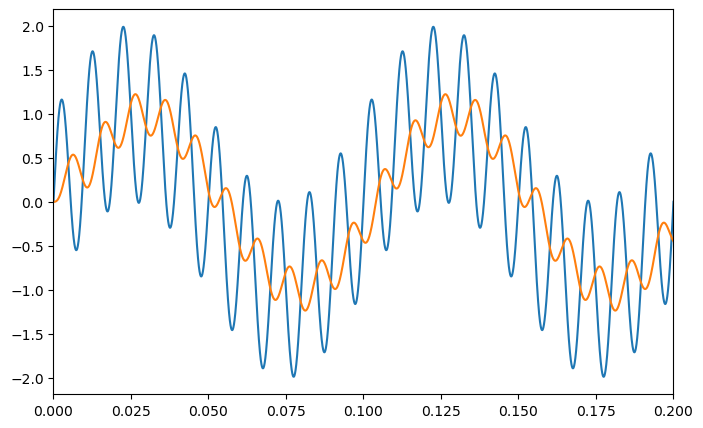

In [9]:
fig, axs = plt.subplots(1,1, figsize=(8,5))
axs.plot(t,sg)
axs.plot(t,sg_filter)
axs.set_xlim(0,0.2)

# HPF butter with SOS

In [7]:
# generates the second order sections
sos = signal.butter(N=order, Wn=w_c, btype='low', output='sos') # digital butterworth
# obtain the phase w and the magnitude h
wn, h = signal.sosfreqz(sos)
f = wn*f_sample/(2*np.pi) # return the angular frequency, from 0 to pi, to frequency in hertz
mag_db = 20*np.log10(abs(h)) # transform the magnitude to decibels
phase = np.angle(h)*(180/np.pi) #wraped phase